In [1]:
count_list= {'SBQ1': [21, 41], 'SBQ2': [23, 41], 'SBQ3': [19, 41], 'SBQ4': [27, 41], 'SBQ5': [13, 41], 'SAQ1': [4, 38], 'SAQ2': [8, 38], 'SAQ3': [35, 38], 'SAQ4': [38, 39], 'SAQ5': [5, 38], 'SPQ1': [36, 37], 'SPQ2': [33, 37], 'SPQ3': [25, 37], 'SPQ4': [32, 37], 'SPQ5': [20, 37], 'LCQ1': [39, 40], 'LCQ2': [40, 40], 'LCQ3': [36, 40], 'LCQ4': [37, 40], 'LCQ5': [31, 40], 'BuCQ2': [17, 39], 'BuCQ3': [36, 39], 'BuCQ4': [26, 39], 'BuCQ5': [15, 39], 'BuCQ6': [32, 39], 'ACQ1': [14, 20], 'ACQ2': [12, 20], 'ACQ3': [7, 20], 'ACQ4': [6, 20], 'AC2Q1': [15, 21], 'AC2Q2': [18, 21], 'AC2Q3': [14, 21], 'AC2Q4': [18, 21], 'CCQ1': [39, 39], 'CCQ2': [34, 39], 'HCQ1': [12, 20], 'HCQ2': [16, 20], 'HCQ3': [17, 20], 'TMQ1': [38, 40], 'TMQ2': [28, 40], 'TMQ3': [40, 40], 'PCQ1': [33, 39], 'PCQ2': [37, 39], 'SB100Q1': [31, 40], 'SB100Q2': [37, 40], 'SB100Q3': [16, 40], 'BCQ3': [29, 38], 'BCQ4': [36, 38], 'CCQ3': [10, 10], 'PCQ3': [10, 10], 'BuCQ1': [10, 10], 'BCQ1': [10, 10], 'BCQ2': [10, 10]}

In [4]:
import math
def calculate_SE(x, n):
    p = x / n
    var_p = p * (1 - p)
    return math.sqrt(var_p / n)

data_dict = count_list
# Calculate SE for each question using the updated data format
SE_dict_updated = {key: calculate_SE(value[0], value[1]) for key, value in data_dict.items()}

SE_dict_updated

{'SBQ1': 0.07806365117108506,
 'SBQ2': 0.07750404789033359,
 'SBQ3': 0.07787756353770713,
 'SBQ4': 0.07405768205084984,
 'SBQ5': 0.07267330424307175,
 'SAQ1': 0.049784489627732485,
 'SAQ2': 0.06613482762500456,
 'SAQ3': 0.04374407672397163,
 'SAQ4': 0.025310159835529474,
 'SAQ5': 0.05483610220174281,
 'SPQ1': 0.026659295238706564,
 'SPQ2': 0.05104866387043433,
 'SPQ3': 0.07695875641236478,
 'SPQ4': 0.05620272917946338,
 'SPQ5': 0.08192885255111733,
 'LCQ1': 0.024685522072664386,
 'LCQ2': 0.0,
 'LCQ3': 0.04743416490252569,
 'LCQ4': 0.041645828122394195,
 'LCQ5': 0.06602556323122129,
 'BuCQ2': 0.0794033618863734,
 'BuCQ3': 0.04266924586347915,
 'BuCQ4': 0.07548513560963972,
 'BuCQ5': 0.07790302823720513,
 'BuCQ6': 0.06145073738618237,
 'ACQ1': 0.10246950765959599,
 'ACQ2': 0.10954451150103323,
 'ACQ3': 0.1066536450385077,
 'ACQ4': 0.10246950765959598,
 'AC2Q1': 0.0985807941917649,
 'AC2Q2': 0.07636035483212127,
 'AC2Q3': 0.10286889997472795,
 'AC2Q4': 0.07636035483212127,
 'CCQ1': 0.0,
 

In [5]:
import numpy as np
# Function to calculate 95% CI for the proportion
def calculate_95CI(x, n, SE):
    p = x / n
    lower_limit = p - (1.96 * SE)
    upper_limit = p + (1.96 * SE)
    return (lower_limit, upper_limit)

SE_dict_updated = {key: calculate_SE(value[0], value[1]) for key, value in data_dict.items()}

# Recalculate 95% CI for each question
CI_dict = {key: calculate_95CI(value[0], value[1], SE_dict_updated[key]) for key, value in data_dict.items()}

# Extract data for plotting
questions_updated = list(CI_dict.keys())
proportions_updated = [data_dict[question][0] / data_dict[question][1] for question in questions_updated]
errors_updated = [(proportions_updated[i] - CI_dict[question][0], CI_dict[question][1] - proportions_updated[i]) for i, question in enumerate(questions_updated)]


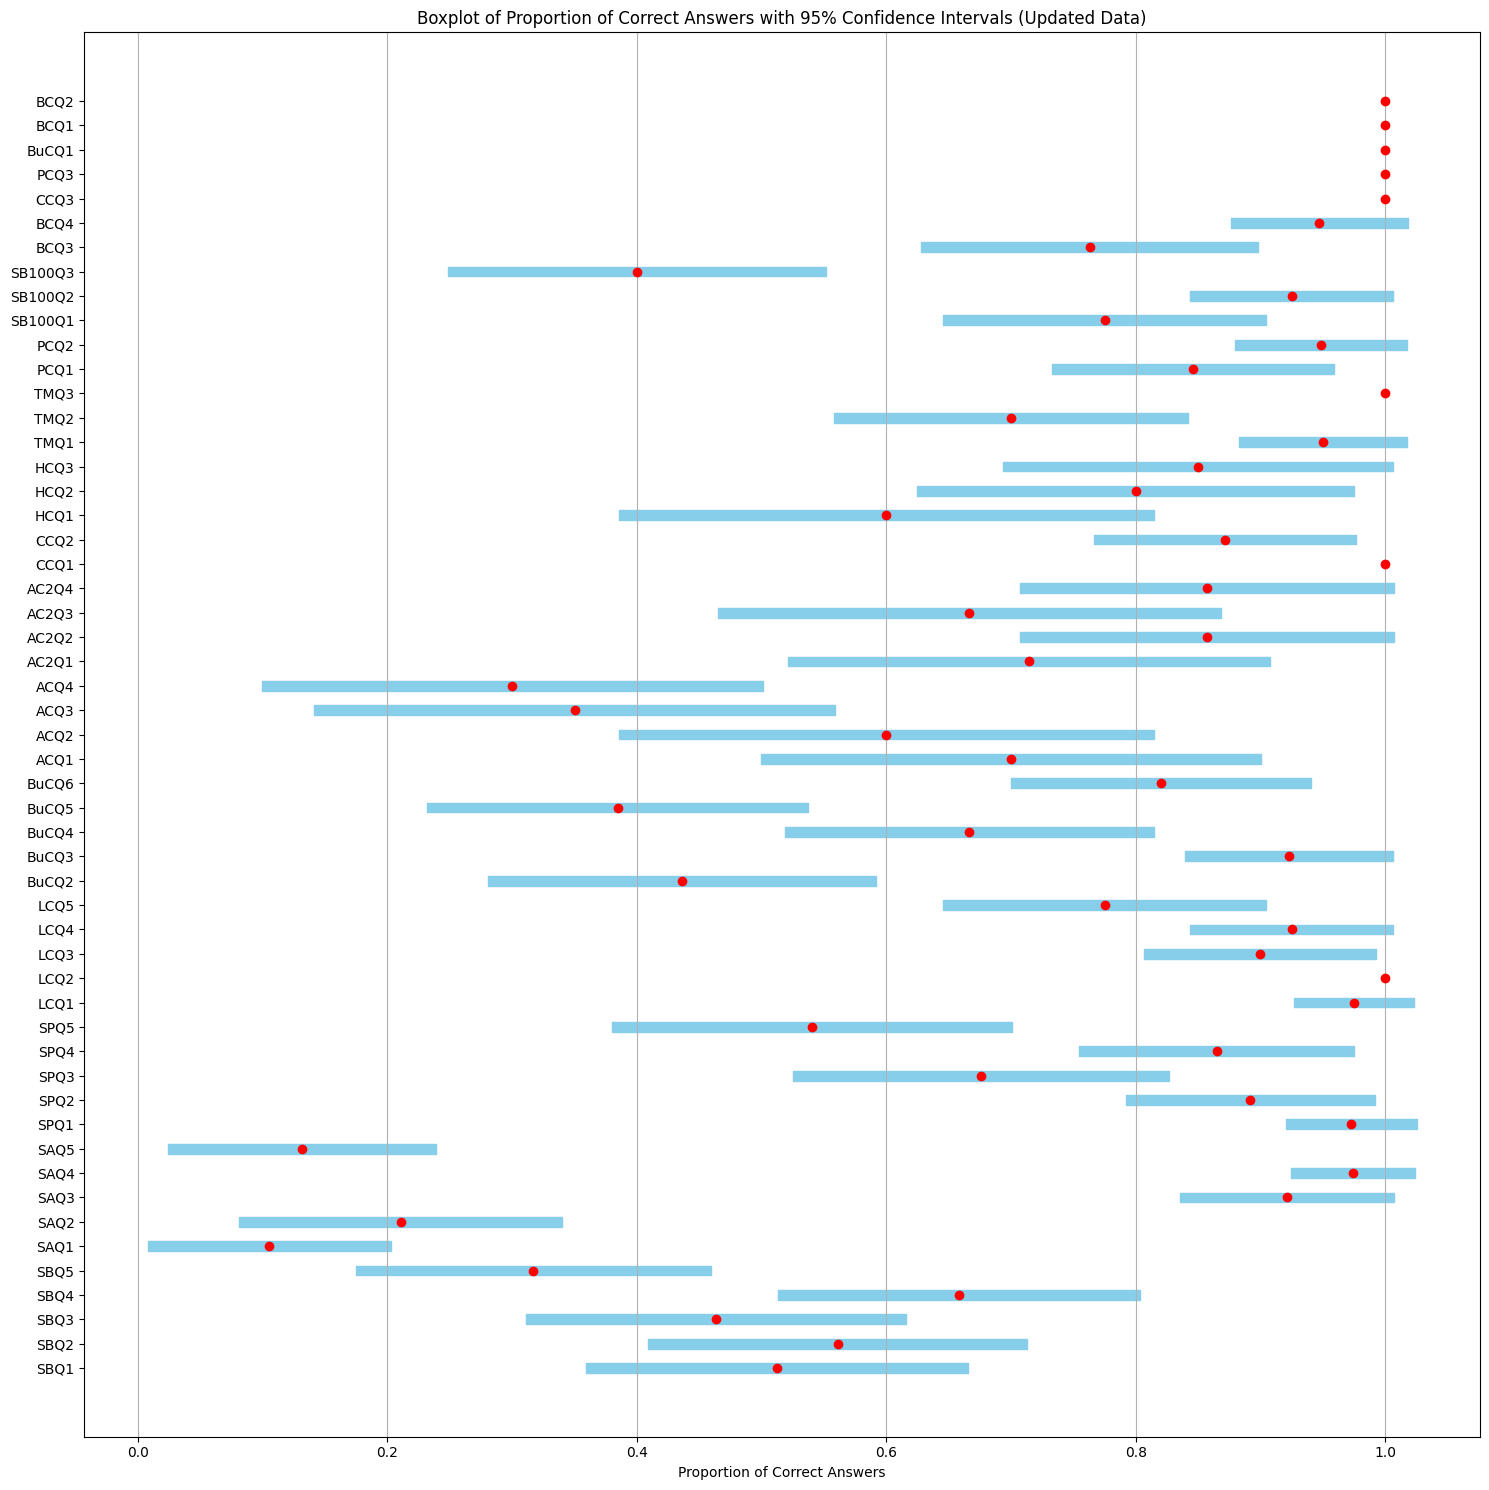

In [6]:
import matplotlib.pyplot as plt

# Extracting data for custom boxplot
medians_updated = proportions_updated
lower_whiskers = [CI_dict[question][0] for question in questions_updated]
upper_whiskers = [CI_dict[question][1] for question in questions_updated]

# Plotting using boxes to represent the 95% CI range
plt.figure(figsize=(15, 15))

for i, question in enumerate(questions_updated):
    plt.fill_betweenx([i-0.2, i+0.2], lower_whiskers[i], upper_whiskers[i], color='skyblue')
    plt.plot(medians_updated[i], i, 'ro')

plt.yticks(range(len(questions_updated)), questions_updated)
plt.xlabel("Proportion of Correct Answers")
plt.title("Boxplot of Proportion of Correct Answers with 95% Confidence Intervals (Updated Data)")
plt.grid(axis='x')
plt.tight_layout()
plt.show()



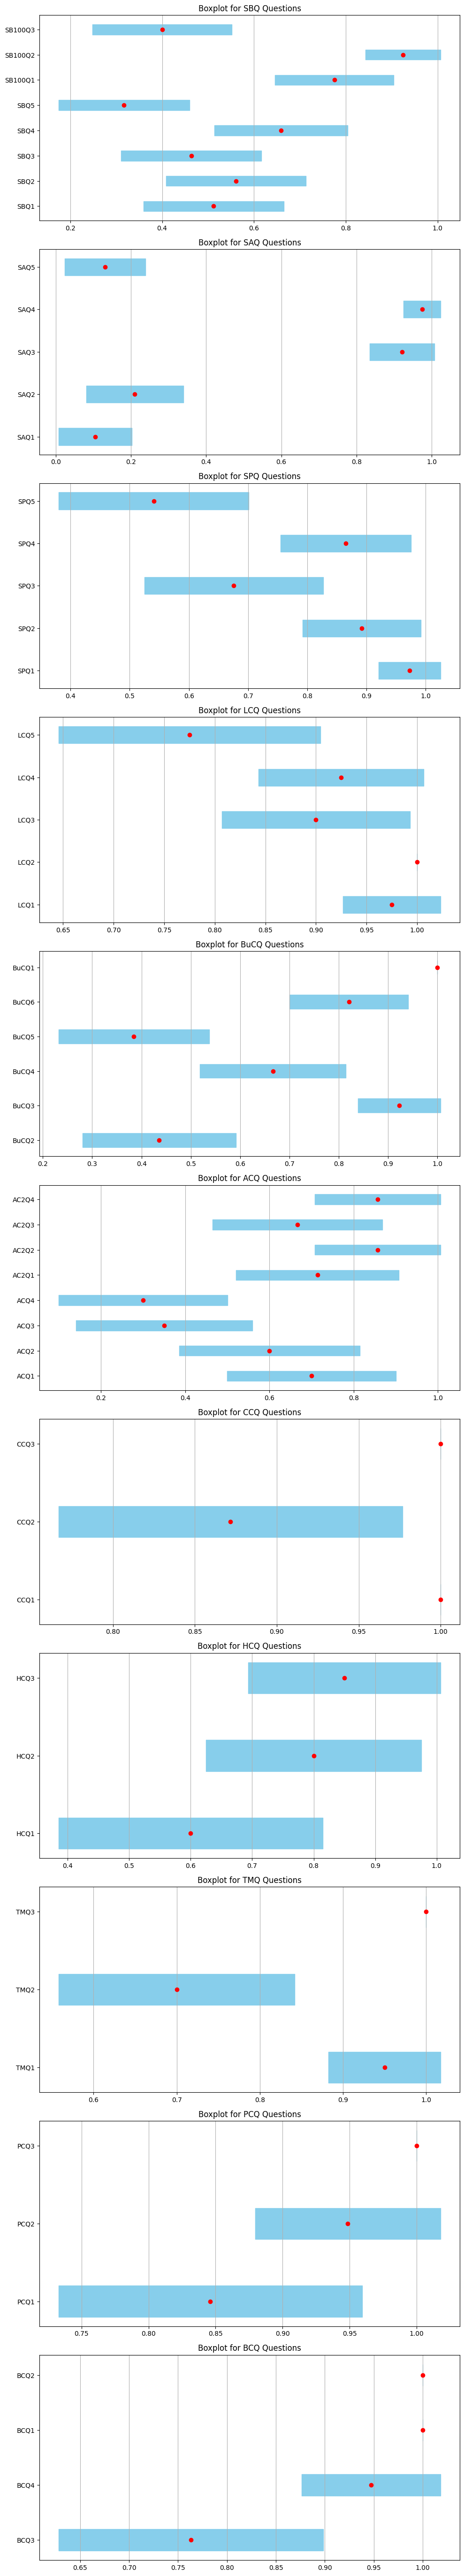

In [7]:
# Grouping questions by their prefixes
from collections import defaultdict

groups = defaultdict(list)
for question in questions_updated:
    prefix = ''.join(filter(str.isalpha, question))
    groups[prefix].append(question)

# Plotting separate box charts for each group
fig, axes = plt.subplots(nrows=len(groups), figsize=(10, 5 * len(groups)))

for ax, (group, group_questions) in zip(axes, groups.items()):
    medians_group = [medians_updated[questions_updated.index(q)] for q in group_questions]
    lower_whiskers_group = [lower_whiskers[questions_updated.index(q)] for q in group_questions]
    upper_whiskers_group = [upper_whiskers[questions_updated.index(q)] for q in group_questions]

    for i, question in enumerate(group_questions):
        ax.fill_betweenx([i-0.2, i+0.2], lower_whiskers_group[i], upper_whiskers_group[i], color='skyblue')
        ax.plot(medians_group[i], i, 'ro')

    ax.set_yticks(range(len(group_questions)))
    ax.set_yticklabels(group_questions)
    ax.set_title(f"Boxplot for {group} Questions")
    ax.grid(axis='x')

plt.tight_layout()
plt.show()
